# **Kütüphaneler**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Veriyi Oku**

In [13]:
df = pd.read_excel("student_lifestyle_dataset_preprocess.xlsx")

In [14]:
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Study_Hours_Per_Day                   2000 non-null   float64
 1   Extracurricular_Hours_Per_Day         2000 non-null   float64
 2   Sleep_Hours_Per_Day                   2000 non-null   float64
 3   Social_Hours_Per_Day                  2000 non-null   float64
 4   Grades                                2000 non-null   float64
 5   Stress_Level_Low                      2000 non-null   float64
 6   Stress_Level_Moderate                 2000 non-null   float64
 7   Gender_Male                           2000 non-null   float64
 8   Physical_Activity_Hours_Per_Day_sqrt  2000 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


# **Model Eğitimi**

In [15]:
X = df.drop("Grades", axis=1).values
y = df["Grades"].values.reshape(-1, 1)

X_b = np.hstack([np.ones((X.shape[0], 1)), X])
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_pred = X_b.dot(theta)
mse = np.mean((y - y_pred) ** 2)

print("Ağırlıklar:\n", theta)
print("Ortalama kare hatası:", mse)

Ağırlıklar:
 [[ 7.80972946e+00]
 [ 5.46163591e-01]
 [-2.35361351e-02]
 [-1.59358734e-02]
 [ 3.13561509e-03]
 [ 1.73919063e-02]
 [-3.89622209e-02]
 [-1.84190712e-02]
 [-4.64729591e-03]]
Ortalama kare hatası: 0.2554010664371433


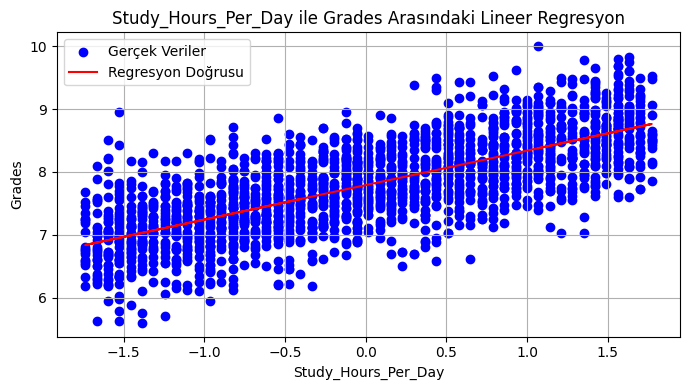

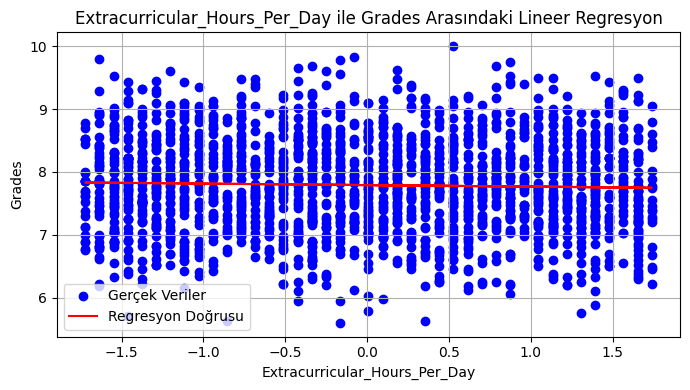

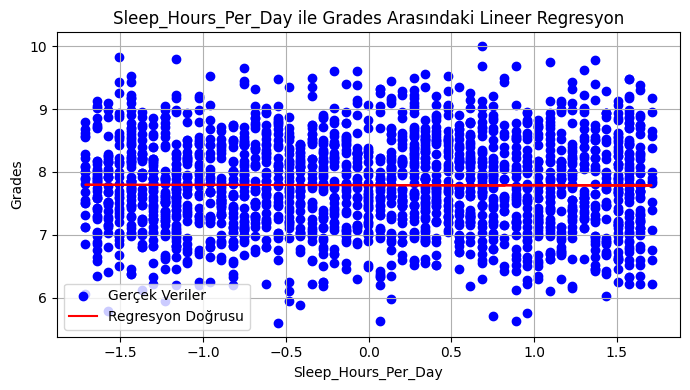

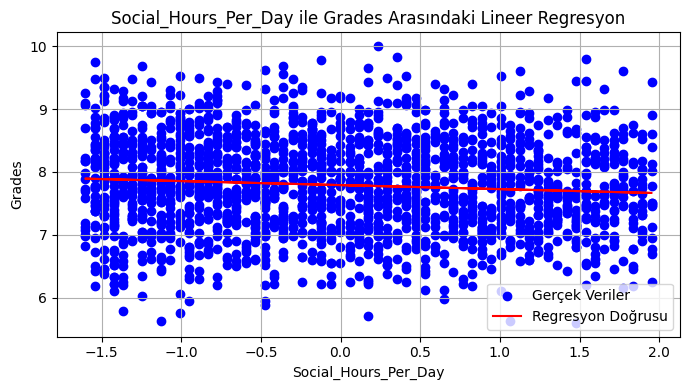

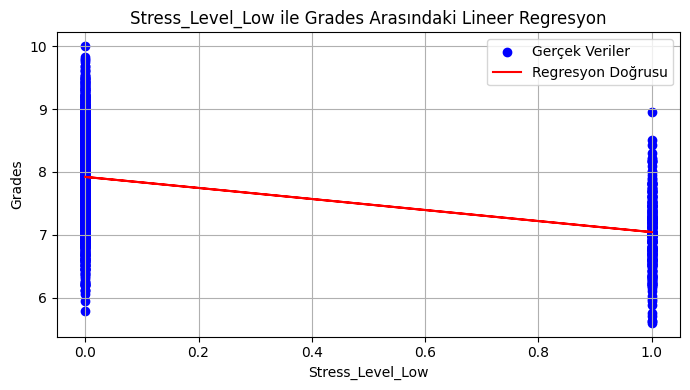

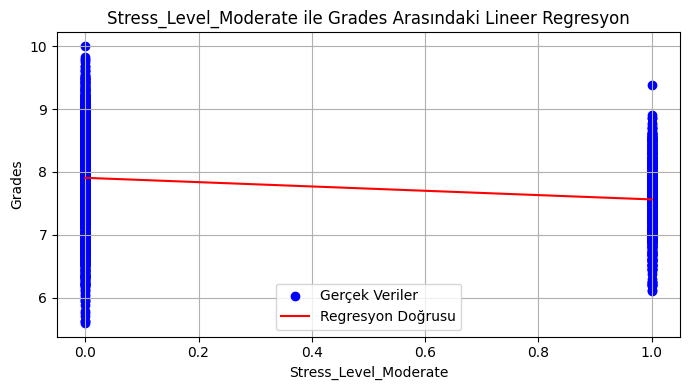

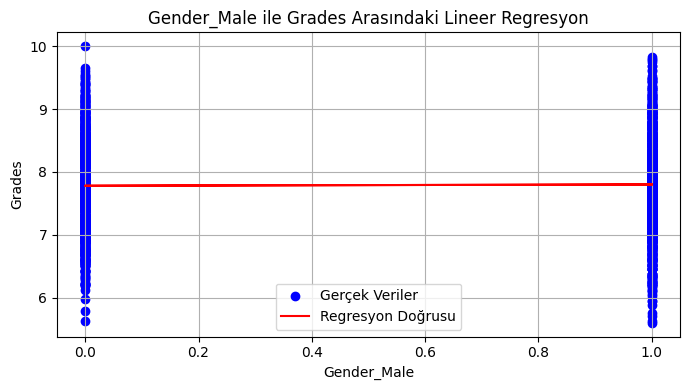

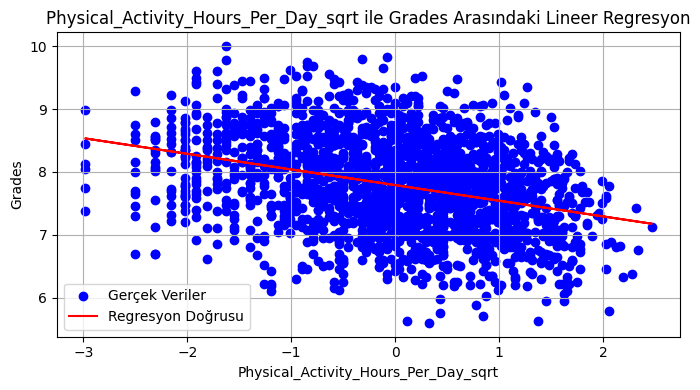

In [16]:
target_col = "Grades"
feature_cols = [col for col in df.columns if col != target_col]
for col in feature_cols:
    X = df[[col]].values
    y = df[[target_col]].values

    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    y_pred = X_b.dot(theta)

    plt.figure(figsize=(7, 4))
    plt.scatter(X, y, color='blue', label='Gerçek Veriler')
    plt.plot(X, y_pred, color='red', label='Regresyon Doğrusu')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"{col} ile {target_col} Arasındaki Lineer Regresyon")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()